# 第４章　パーセプトロン: 分類アルゴリズムの基礎
---
分類アルゴリズムの基礎となる**パーセプトロン**を取り上げる。
> keyword: **誤差関数**, **確率的勾配降下法**

* 本日のタスク  
$t = \pm1$の2種類の属性を持つデータを分類する**直線**を発見する。  
![データの分類](today_task.png)

---
## 4.1 確率的勾配降下法のアルゴリズム
パーセプトロンは**誤差関数**を用いた計算方法。  
以下の3つの手順で分類を行う。

1. パラメーターを含むモデル（数式）を設定。
2. パラメーターを評価する基準の決定。
3. 最良の評価を与えるパラメーターの決定。

### 4.1.1 平面を分割する直線の方程式
ステップ1として、パラメーターを含むモデル（数式）を用意する。  
  
\begin{equation}
\\
  f(x, y) = w_0 + w_1x + w_2y
\\
\end{equation}
  
この時、$(x,y)$平面を分割する直線（**境界線**）は、次式で表される。
  
\begin{equation}
\\
f(x,y) = 0
\\
\end{equation}

分割された2つの領域は、**$f(x,y)$の符号で判別**できるようになる。  

具体例として、$f(x,y) = -10 + 3x + 2y$の場合を示す。  
以下のように、境界線から離れるほど、$f(x,y)$の絶対値が大きくなるという特徴が読み取れる。

[$f(x,y) < 0$]
* $(-8,2)$の場合:$f(x,y) = -30$
* $(-5,5)$の場合:$f(x,y) = -15$

[$f(x,y) = 0$]
* $(0, 5)$の場合:$f(x,y) = 0$

[$f(x,y) > 0$]
* $(5, 5)$の場合:$f(x,y) = 15$
* $(4,14)$の場合:$f(x,y) = 30$

$(x,y)$平面をこのように分割する目的は、$t = \pm1$の2種類の属性を持つデータを分類すること。  
今回は以下のルールでデータを分類することにする。

\begin{eqnarray}
\\
f(x,y) > 0 \Rightarrow t = +1 \\
f(x,y) < 0 \Rightarrow t = -1
\\
\end{eqnarray}

この時、トレーニング用のデータ$\{(x_n,y_n,t_n)\}^{N}_{n=1}$に対し、それぞれ正しく分類されているかどうかは、以下のルールで判定できる。

\begin{eqnarray}
\\
f(x_n,y_n) \times t_n > 0 : 正解 \\
f(x_n,y_n) \times t_n \leq 0 : 不正解
\\
\end{eqnarray}

このルールを使うことで、$t_n = \pm1$のどちらのデータについても、**同じルールで正解／不正解が判定できる**。  

すべてのトレーニング用データ「$(x_n,y_n,t_n)$」について、$f(x_n,y_n) \times t_n > 0$が成り立つ直線、つまり、**$f(x, y) = w_0 + w_1x + w_2y$の係数$(w_0,w_1,w_2)$を見つけること**が目標となる。

### 4.1.2 誤差関数による分類結果の評価
パラメータの評価基準として、正しく分類できなかった点が存在する場合、それを**誤差**として計算する。  
この誤差の合計値が小さいほど、正しい分類に近いものと考える。  

具体的な誤差の値とは「境界線から離れるほど、$f(x,y)$の絶対値が大きくなる」という特徴を利用し、以下の値を採用する。  

\begin{eqnarray}
\\
E_n = |f(x_n,y_n)|
\\
\end{eqnarray}

誤って分類された点の誤差を合計したものが、分類の誤差$E$となる。  

\begin{eqnarray}
\\
E = \sum_nE_n = \sum_n|f(x_n,y_n)|
\\
\end{eqnarray}

上記式は不正解時のルール「$f(x_n,y_n) \times t_n \leq 0$」を満たすので、次の関係式が成り立つ。  

\begin{eqnarray}
\\
|f(x_n,y_n)| = -f(x_n,y_n) \times t_n
\\
\end{eqnarray}

さらに、$f(x,y)$の定義「$f(x, y) = w_0 + w_1x + w_2y$」を用いると、「$E = \sum_nE_n = \sum_n|f(x_n,y_n)|$」は以下のように表される。  

\begin{eqnarray}
\\
E = -\sum_n(w_0 + w_1x_n + w_2y_n)t_n
\\
\end{eqnarray}

これをベクトルで表現すると以下のように表される。  

\begin{eqnarray}
\\
E = -\sum_nt_n\omega^T\Phi_n
\\
\end{eqnarray}

$\omega$と$\Phi$は次で定義される**ベクトル**になる。

\begin{eqnarray}
\\
  {\omega} = \left(
    \begin{array}{c}
      w_0 \\
      w_1 \\
      w_2
    \end{array}
  \right)
\\
\end{eqnarray}

\begin{eqnarray}
\\
  {\Phi} = \left(
    \begin{array}{c}
      1 \\
      x_n \\
      y_n
    \end{array}
  \right)
\\
\end{eqnarray}

ベクトル$\Phi$の「1」は**バイアス項**と呼ばれ、ベクトル形式で表すために導入される。  
※バイアス項は後述の「アルゴリズムの収束性」に深く関係する。  

誤差$E$が小さくなるほど、トレーニングセットは適切に分類されていると考えることができる。  
すべてのデータが正しく分類できた場合は、$E = 0$になる。  

最後のステップは、誤差$E$を最小にするためのパラメータ$\omega$を求めること。  
このために、**確率的勾配降下法**を使用する。

### 4.1.3 勾配ベクトルによるパラメーターの修正

最小二乗法では、パラメーターによる偏微分係数が0になるという条件から、二乗誤差$E_D$を最小にする係数$w$を決定することができた。  
これと同様に、$E = -\sum_n(w_0 + w_1x_n + w_2y_n)t_n$の誤差$E$の偏微分係数を0としてみる。

\begin{eqnarray}
\\
\frac{\partial E}{\partial w_m} = 0 \ \ \ (m = 0,1,2)
\\
\end{eqnarray}

または、勾配ベクトルが0になるとしても構わない。

\begin{eqnarray}
\\
\nabla E(w) = - \sum_n t_n \Phi_n = 0
\\
\end{eqnarray}

一般的に勾配ベクトルは、以下の式で定義されるベクトルになる。

\begin{eqnarray}
\\
  \nabla E(w) = \left(
    \begin{array}{c}
      \frac{\partial E}{\partial w_0} \\
      \frac{\partial E}{\partial w_1} \\
      \frac{\partial E}{\partial w_2}
    \end{array}
  \right)
\\
\end{eqnarray}

上記の式を見てもわかる通り、この式の中には係数$w$は含まれていない。  
よって、純粋な式変形で$w$を求めることはできない。  

そこで、勾配ベクトルの幾何学的な性質を利用し、数値計算を用いて$w$の値を修正しながら、誤差$E$がなるべく小さくなるものを求める。  
以下にとある誤差関数$E$の軌跡を表す。

![誤差関数E](func_E.png)

青い曲線が誤差関数$E$の軌跡を表している。  
上図の通り、曲線の**底は誤差が殆ど無い地点**となり、その時の$w$は**最適化された係数（$w^{opt}$）**となる。  

具体例として、次の関数を考える。  

\begin{eqnarray}
\\
w(x,y) = \frac{3}{4}(x^{2} + y^{2})
\\
\end{eqnarray}

この場合、勾配ベクトルは次のように計算される。  

\begin{eqnarray}
\\
  \nabla w = \left(
    \begin{array}{c}
      \frac{\partial w}{\partial x} \\
      \frac{\partial w}{\partial y}
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      \frac{3}{2}x \\
      \frac{3}{2}y
    \end{array}
  \right)
\\
\end{eqnarray}

この時、任意の点$(x,y)$において、どちらかの方向に少し移動すると$w$の値が増減する。  
勾配ベクトル$\nabla w$は、$w$の値が最も増加する方向、すなわち「斜面をまっすぐ這い上がる方向」を表す。  

また、勾配ベクトルの大きさは、その点における斜面（接点）の傾きを表す。  
つまり、各点における勾配ベクトルの方向に移動して行けば、$w(x,y)$の値はどんどん大きくなっていく。  

逆に言うと、勾配ベクトルの反対方向に進めば、$w(x,y)$の値は小さくなる。  
勾配ベクトルが$+ \nabla w$の場合は曲線の底から離れる方向に向かい、逆に$- \nabla w$の場合は曲線の底に近づいていく。  

これは、現在の地点を$w_{old}$として、次の地点を$w_{new}$を以下の式で決定するアルゴリズムとして表現することができる。

\begin{eqnarray}
\\
w_{new} = w_{old} - \nabla w
\\
\end{eqnarray}

これを何度も繰り返して座標$(x,y)$を更新していくと、どのようにして底に近づいて行くか想像してみる。  
$\nabla w$が大きすぎると、底を通り越して反対側の斜面に行ってしまうことがあるが、上手い具合に底に近くなるほど、$\nabla w$の大きさは小さくなっていく。  
底の上を行ったり来たりしながら徐々に底に近づいて行く。  
そして、最終的に底にたどり着くと、その点での勾配ベクトルは0になるので、そこで停止することになる。

![誤差関数E](func_E_2.png)

> 確率的勾配降下法の**勾配降下**  
> point : 現在の地点$w_{old}$から曲線の傾き(勾配)方向に転がり落ちていき、底(誤差が殆ど無い地点)を目指すイメージ。

ところで、確率的勾配降下法の**確率的**とは、データからサンプリングを行って勾配ベクトルを計算することを意味している。  
すなわち、正しく分類されていない点$(x_n,y_n)$をどれかひとつ選び、とりあえず、その分だけパラメーターを修正する。  
さらに、修正された新しい$w$の下で、正しく分類されていない点をひとつ選び、同様にパラメーターを修正する。  

このように「正しく分類されていない点」をランダムに選びながら、パラメーターを修正していくテクニックが「**確率的勾配降下法**」になる。  

なお、全ての点を正しく分類する直線が存在しない場合、$w$の値はいつまでも変化を続ける。  
よって、一定回数だけ処理を繰り返し、それでも正しく分類されない点が残る場合は、そこで処理を打ち切り、その時点の$w$を採用する。  
このように処理を打ち切ることを**早期終了**と呼ばれ、パーセプトロンの重要なテクニックの一つになっている。

### 4.1.4 サンプルコードによる確認
#### 分類が容易なトレーニングセットの場合
はじめに必要なモジュールをインポートする。  
関数 multivariate_normal は、多次元の正規分布に従う乱数を生成するために利用する。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import multivariate_normal

トレーニング用データを生成する関数を用意する。  
平面上の○☓の2種類のデータについて、それぞれの「個数、中心座標、分散」を引数で指定する。

In [2]:
def prepare_dataset(n1, mu1, variance1, n2, mu2, variance2):
    df1 = DataFrame(multivariate_normal(mu1, np.eye(2)*variance1 ,n1),
                    columns=['x','y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(mu2, np.eye(2)*variance2, n2),
                    columns=['x','y'])
    df2['type'] = -1
    df = pd.concat([df1,df2], ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

実際にデータを作成する。  

In [3]:
train_set = prepare_dataset(20, [15,10], 15, 30, [0,0], 15)

先頭から10個分のデータを確認する。  
type=±1 がデータの種類に対応する。

In [4]:
train_set[:10]

,x,y,type
0,-3.543299,-0.059333,-1
1,-1.810103,3.017212,-1
2,10.305565,9.901827,1
3,-4.824187,-0.099316,-1
4,20.162892,10.035364,1
5,2.967327,4.173751,-1
6,-7.305286,3.006287,-1
7,11.063963,8.432609,1
8,3.183854,-5.772162,-1
9,15.285785,7.316585,1


パーセプトロンによる分類を実施する関数を用意する。  
生成したトレーニングセットを引数で渡すと、30回のIterationを実施した後に、この間のパラメーターの変化を記録したリストと最終的な誤分類率を返す。

In [5]:
def run_train(train_set):
    # パラメータの初期値とbias項の設定
    w0 = w1 = w2 = 0.0
    bias = 0.5 * (train_set.x.mean() + train_set.y.mean())

    # Iterationを実施
    paramhist = DataFrame([[w0,w1,w2]], columns=['w0','w1','w2'])
    for i in range(30):
        for index, point in train_set.iterrows():
            x, y, type = point.x, point.y, point.type
            if type * (w0*bias + w1*x + w2*y) <= 0:
                w0 += type * 1 
                w1 += type * x
                w2 += type * y
        paramhist = paramhist.append(Series([w0,w1,w2], ['w0','w1','w2']),
                                     ignore_index=True)
    
    # 判定誤差の計算
    err = 0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        if type * (w0*bias + w1*x + w2*y) <= 0:
            err += 1
    err_rate = err * 100 / len(train_set)
    
    return paramhist, err_rate

トレーニングを実施する。

In [6]:
paramhist, err_rate = run_train(train_set)

パラメーターの変化の先頭部分を確認する。

In [7]:
paramhist[:5]

,w0,w1,w2
0,0,0.000000,0.000000
1,-4,2.636836,1.043591
2,-6,4.566316,0.085247
3,-11,5.502693,8.741385
4,-12,4.770595,8.660399


分類結果をグラフに可視化する関数を用意する。

In [8]:
# 結果の表示
def show_result(subplot, train_set, w0, w1, w2, err_rate):
    train_set1 = train_set[train_set['type']==1]
    train_set2 = train_set[train_set['type']==-1]
    bias = 0.5 * (train_set.x.mean() + train_set.y.mean())
    ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10

    subplot.set_ylim([ymin-1, ymax+1])
    subplot.set_xlim([xmin-1, xmax+1])
    subplot.scatter(train_set1.x, train_set1.y, marker='o', label=None)
    subplot.scatter(train_set2.x, train_set2.y, marker='x', label=None)

    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - bias * w0 / w2
    label = "ERR %.2f%%" % err_rate
    subplot.plot(linex, liney, label=label, color='red')
    subplot.legend(loc=1)

分類結果をグラフに表示する。

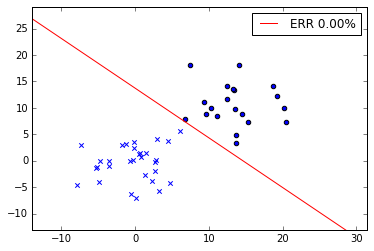

In [9]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
params = paramhist[-1:]
w0, w1, w2 = float(params.w0), float(params.w1), float(params.w2)
show_result(subplot, train_set, w0, w1, w2, err_rate)

同じくパラメーターの変化の様子をグラフに表示する。

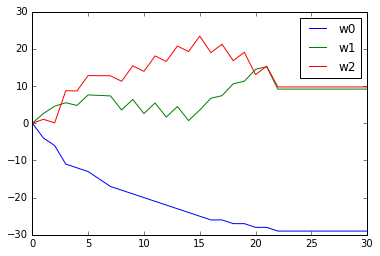

In [10]:
paramhist.plot().legend(loc=1)

#### 分類が困難なトレーニングセットの場合
先程よりも分散が大きく、分類な困難なトレーニングセットを用意する。

In [11]:
train_set = prepare_dataset(20, [15,10], 30, 30, [0,0], 30)

トレーニングを実施して、結果をグラフに表示する。

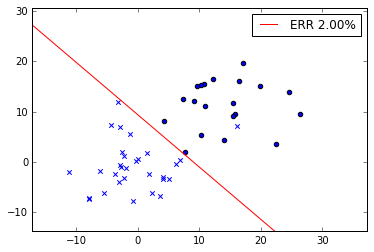

In [12]:
paramhist, err_rate = run_train(train_set)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
params = paramhist[-1:]
w0, w1, w2 = float(params.w0), float(params.w1), float(params.w2)
show_result(subplot, train_set, w0, w1, w2, err_rate)

同じく、パラメーターの変化をグラフに表示する。

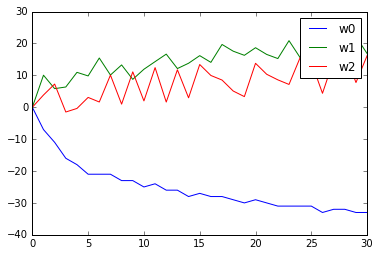

In [13]:
paramhist.plot().legend(loc=1)

## 4.2 パーセプトロンの幾何学的な解釈
ここでは、確率的勾配降下法の「**収束速度**」について考える。  

データを完全に分割する直線が存在する場合、パラメーター$w$を更新していくと、いつかはその直線にたどり着く。  
しかし、具体的に何回ぐらい更新すればよいのかは分からない。  
30回、300回、あるいは3万回繰り返さないと正解にたどり着かない可能性もある。  
このように、パラメーターを繰り返し更新するアルゴリズムにおいて、どの程度すばやく正解にたどり着けるかという早さを「**アルゴリズムの収束性**」と呼ぶ。  

### 4.2.1 バイアス項の任意性とアルゴリズムの収束性
$(x,y)$平面を直線で分割するための関数$f(x,y)$は以下のように定義することが可能。

\begin{eqnarray}
\\
f(x,y) = 2w_0 + w_1x + w_2y
\\
\end{eqnarray}

この場合、誤差関数$E$は以下のように表される。

\begin{eqnarray}
\\
E = -\sum_n t_n w^{T} \Phi_n
\\
\end{eqnarray}

\begin{eqnarray}
\\
  w = \left(
    \begin{array}{c}
      w_0 \\
      w_1 \\
      w_2
    \end{array}
  \right)
\\
\end{eqnarray}

\begin{eqnarray}
\\
  \Phi_n = \left(
    \begin{array}{c}
      2 \\
      x_n \\
      y_n
    \end{array}
  \right)
\\
\end{eqnarray}

ベクトル$\Phi_n$のバイアス項が2になっている点がこれまでと異なるが、誤差関数の形は変わっていない。  
よって、先ほどと同じ議論を繰り返すことで、まったく同じ確率的勾配降下法の手続きが得られる。  

\begin{eqnarray}
\\
w_{new} = w_{old} + t_n \Phi_n
\\
\end{eqnarray}

ただし、ベクトル$\Phi_n$はバイアス項を2にしたものを使うため、上記式を使って$w$を更新すると、$w_0$は$\pm2$だけ変化する。  
つまり、バイアス項の値を適切に選ぶことで、アルゴリズムの収束速度を改善することが可能になる。  

![誤差関数E](func_E_3.png)